# P-210 Fake Bills Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import ppscore as ps
import plotly.express as pe

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import BaggingClassifier,StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Read Dataset
df = pd.read_csv("fake_bills.csv",sep=";")
df.sample(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
254,True,172.17,104.21,103.87,4.35,2.98,113.66
1438,False,171.90,104.28,104.29,NaN,3.24,111.49
1117,False,171.94,104.14,104.14,4.69,3.06,112.04
502,True,171.70,103.79,103.98,4.44,3.03,113.94
497,True,172.45,103.95,103.50,4.10,3.08,113.23
22,True,172.10,103.96,103.71,3.93,2.89,112.68
23,True,172.56,103.85,103.62,3.32,3.13,113.37
1437,False,171.92,104.18,103.90,5.67,3.58,112.37
1404,False,171.76,103.79,104.05,5.12,3.22,112.08
1184,False,171.97,103.95,103.73,5.15,3.24,110.87


- Data Dictionary    
    - diagonal -- the diagonal of the bill in mm
    - height left -- the height of the left side of the bill in mm
    - height right -- the height of the right side of the bill in mm
    - margin low -- lower side margin in mm
    - margin up -- upper side margin in mm
    - length -- the length of the bill in mm

## Exploratory Data Analysis

In [4]:
print("The number of features in the 'fake_bills.csv' dataset is {0} and the feature names are \"{1}\".".format(len(df.columns),'", "'.join(df.columns.to_list())))

The number of features in the 'fake_bills.csv' dataset is 7 and the feature names are "is_genuine", "diagonal", "height_left", "height_right", "margin_low", "margin_up", "length".


In [5]:
print("The number of records in the dataset are {}.".format(df.shape[0]))

The number of records in the dataset are 1500.


In [6]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [7]:
# Checking for any null values
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [8]:
# Checking For null values percentage 
(df.isnull().sum()/df.shape[0])*100

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64

#### Following are the null values found in margin_low column

In [9]:
df[df["margin_low"].isna()]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


#### Replacing null values with median as the amount of null values is less than 3%

In [10]:
print("The median value for feature 'margin_low' is ",df["margin_low"].median())
print("The mean value for feature 'margin_low' is ",round(df["margin_low"].mean(),2))

The median value for feature 'margin_low' is  4.31
The mean value for feature 'margin_low' is  4.49


In [11]:
# Fill null values with the median
df.fillna(df['margin_low'].median(), inplace=True)

In [12]:
le = LabelEncoder()

df["is_genuine"] = le.fit_transform(df["is_genuine"])

In [13]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [14]:
# Checking for any duplicated records
df[df.duplicated(keep=False)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


There are no duplicated records

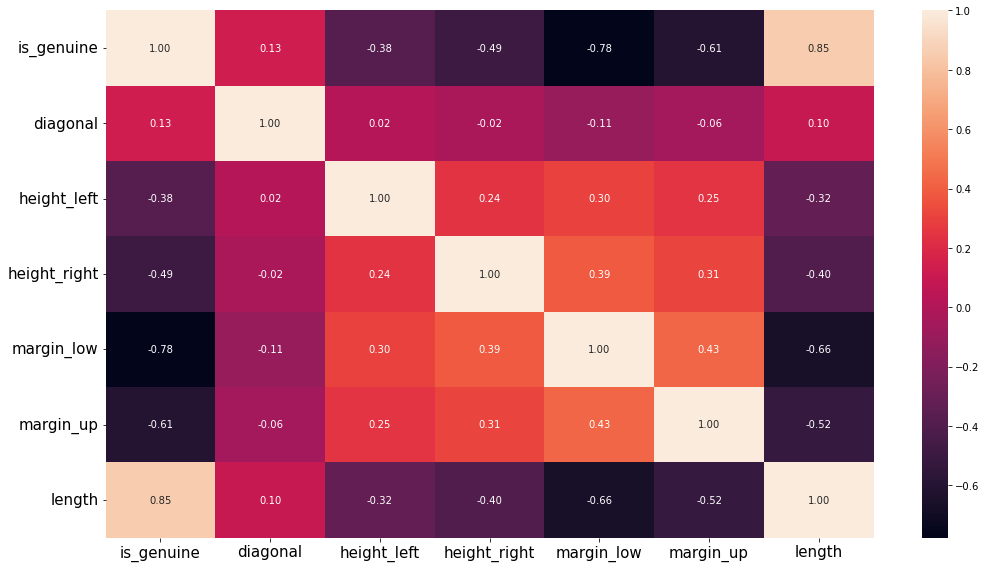

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,fmt="0.2f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15,rotation=0)
plt.tight_layout()
plt.show()

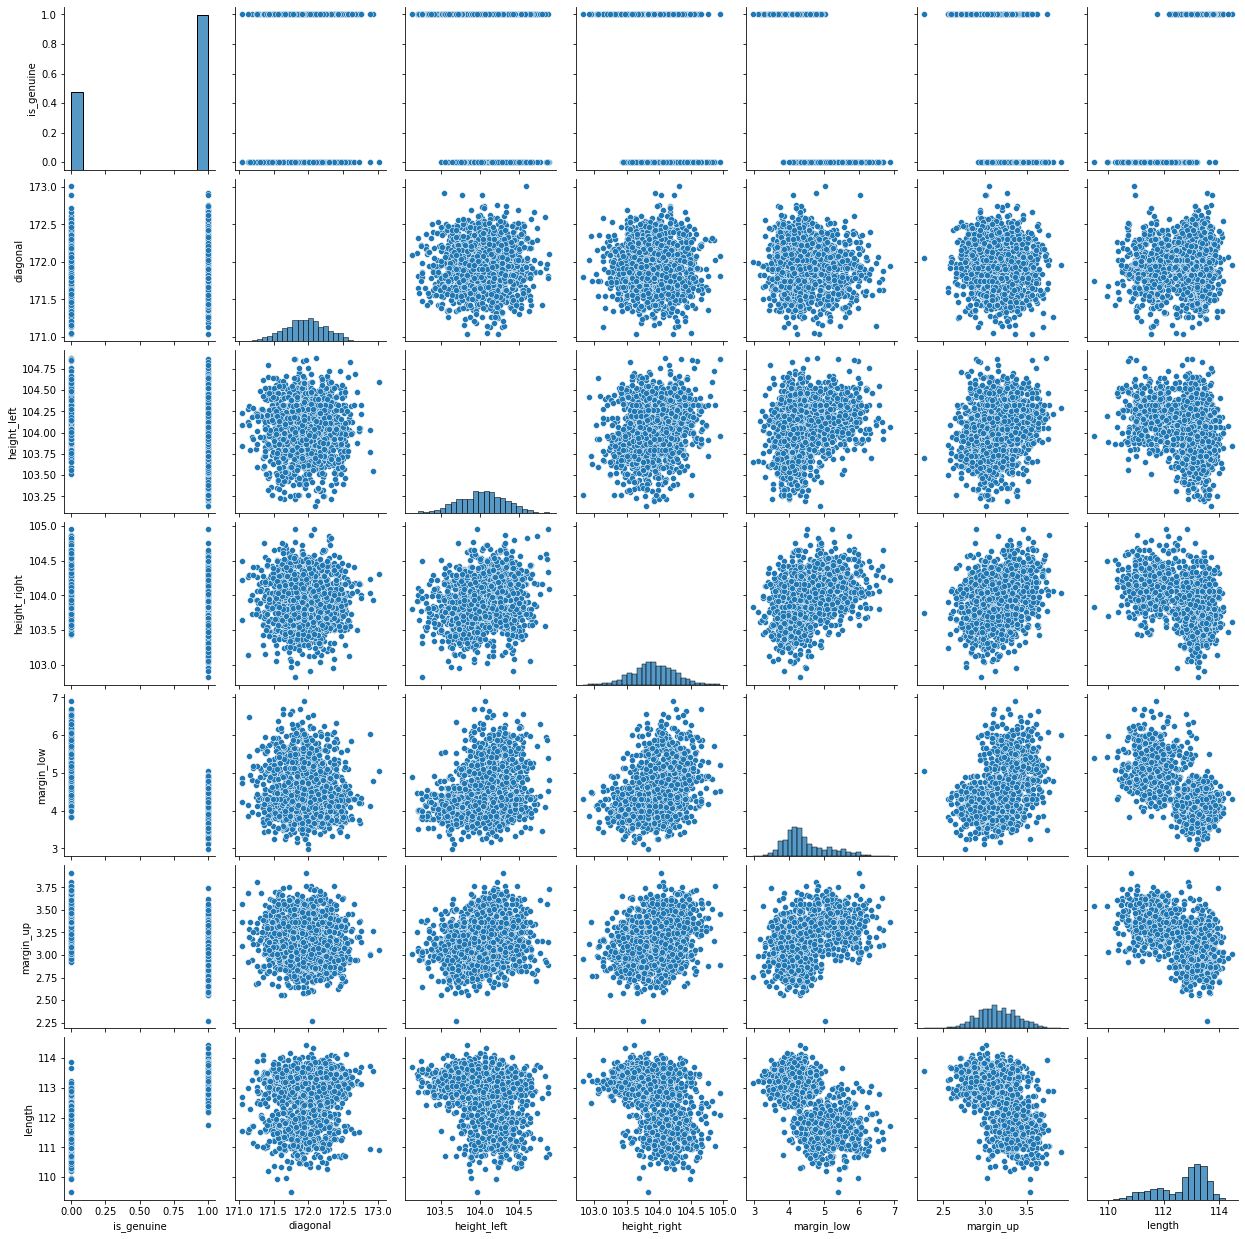

In [16]:
sns.pairplot(df)

#### From the above pairplot we can see that length and margin_low columns are left and right skewed respectively

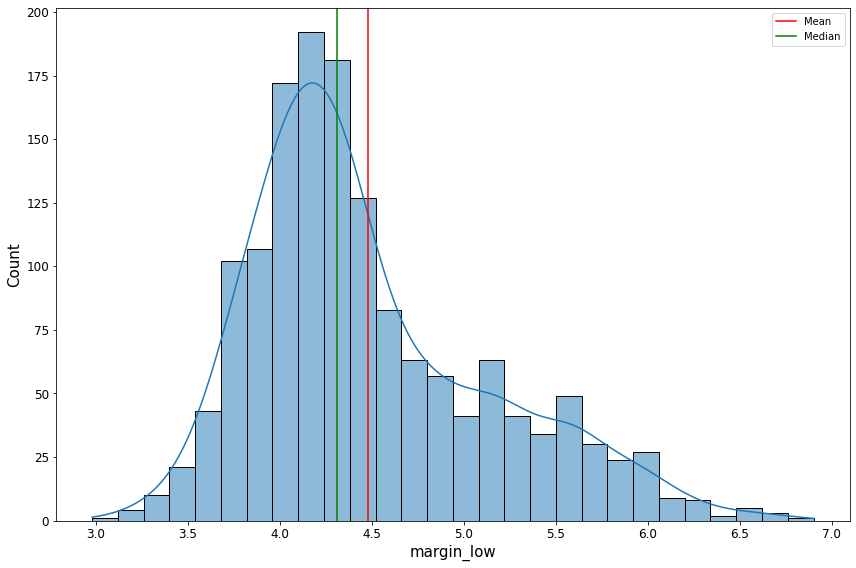

In [17]:
plt.figure(figsize=(12,8))
sns.histplot(df['margin_low'], kde=True)
plt.axvline(df['margin_low'].mean(), c='red',label="Mean")
plt.axvline(df['margin_low'].median(), c='green',label="Median")
plt.xlabel('margin_low',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

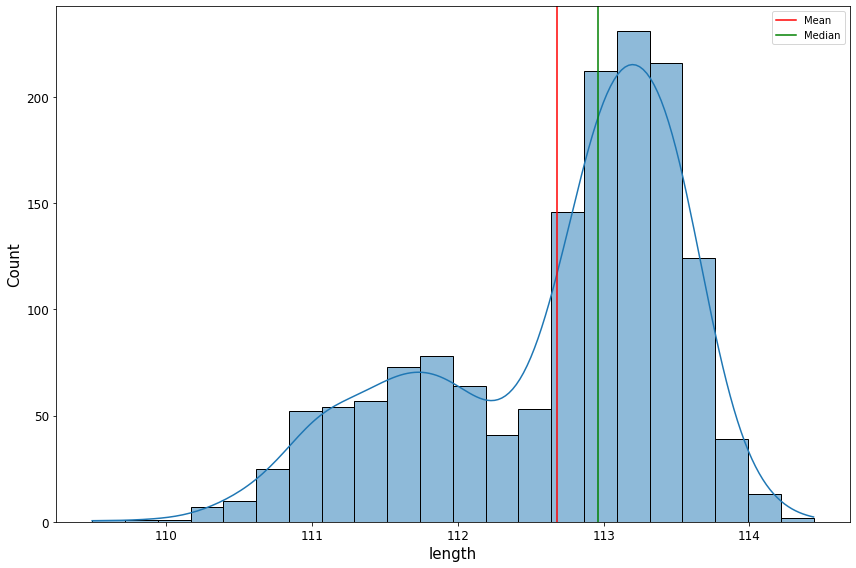

In [18]:
plt.figure(figsize=(12,8))
sns.histplot(df['length'], kde=True)
plt.axvline(df['length'].mean(), c='red',label="Mean")
plt.axvline(df['length'].median(), c='green',label="Median")
plt.xlabel('length',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.legend()
plt.show()

#### Checking for outliers using Z-Score

In [19]:
z = np.abs(zscore(df.iloc[:, 1:]))

In [20]:
z

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.486540,2.774123,3.163240,0.058503,1.128325,0.173651
1,1.633729,2.236535,0.799668,1.084932,0.696799,0.471666
2,2.397823,1.504756,1.291191,0.124446,0.912562,0.551901
3,1.961498,0.399294,0.060498,1.313618,0.610494,0.953075
4,0.748754,0.836669,1.414072,0.673295,1.417677,0.158750
...,...,...,...,...,...,...
1495,0.683201,1.170713,0.767063,0.093955,0.265273,1.602978
1496,0.758981,2.005822,1.596509,1.201938,0.942999,1.958303
1497,0.519316,0.065250,0.613462,1.567837,0.899846,0.835016
1498,0.332882,0.836669,0.429141,1.049480,1.331372,0.491152


In [21]:
outliers_idx = z[z.values >= 3].index # == np.where(z >= 3)
len(outliers_idx)

24

### Outliers indexes

In [22]:
df.iloc[outliers_idx, :]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
251,1,171.80,103.26,102.82,4.31,2.95,113.22
522,1,172.02,104.42,102.91,3.86,3.12,113.43
664,1,172.05,103.70,103.75,5.04,2.27,113.55
729,1,171.04,103.84,103.64,4.22,3.36,112.70
828,1,172.92,103.55,103.94,4.78,3.27,113.55
842,1,172.89,103.77,104.24,4.12,3.01,113.72
1022,0,172.89,104.03,104.03,6.03,3.00,110.95
1027,0,171.63,104.02,104.66,6.70,3.28,111.28
1029,0,171.96,104.29,104.03,6.01,3.91,110.83


### Removing outliers

In [23]:
clean_df = df.drop(index=outliers_idx) # == df.drop(outliers_idx, axis=0)
clean_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
5,1,172.17,103.74,104.08,4.42,2.95,112.81
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [24]:
# Value counts for the Target feature "is_genuine"

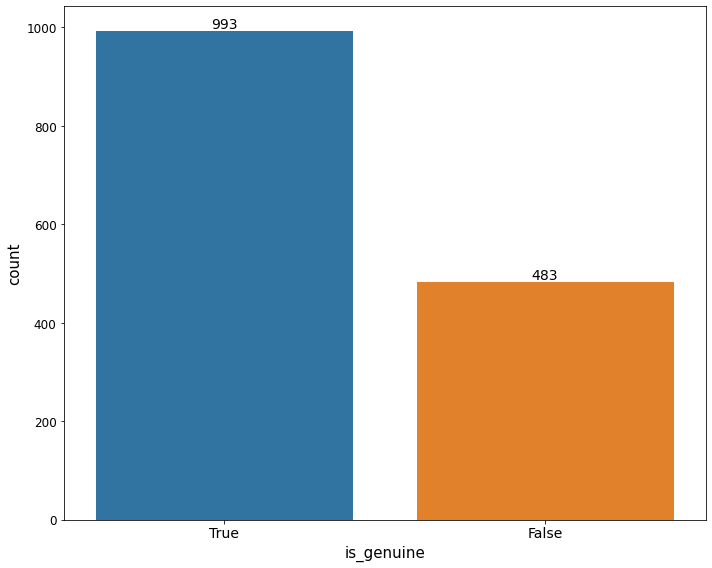

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=clean_df['is_genuine'],order=[1,0])
plt.xticks([0,1],["True","False"],fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("is_genuine",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.text(0,clean_df['is_genuine'].value_counts()[1],clean_df['is_genuine'].value_counts()[1],ha="center",va="bottom",fontsize=14)
plt.text(1,clean_df['is_genuine'].value_counts()[0],clean_df['is_genuine'].value_counts()[0],ha="center",va="bottom",fontsize=14)
plt.tight_layout()
plt.show()

In [26]:
# Separate features and target variable

X = clean_df.drop('is_genuine', axis=1)
y = clean_df['is_genuine']

In [27]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [28]:
# Combine resampled features and target variable

balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

In [29]:
balanced_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,171.46,103.36,103.66,3.77,2.99,113.09,1
1,172.69,104.48,103.50,4.40,2.94,113.16,1
2,171.36,103.91,103.94,3.62,3.01,113.51,1
3,171.73,104.28,103.46,4.04,3.48,112.54,1
4,172.17,103.74,104.08,4.42,2.95,112.81,1


In [30]:
balanced_df['is_genuine'].value_counts()

1    993
0    993
Name: is_genuine, dtype: int64

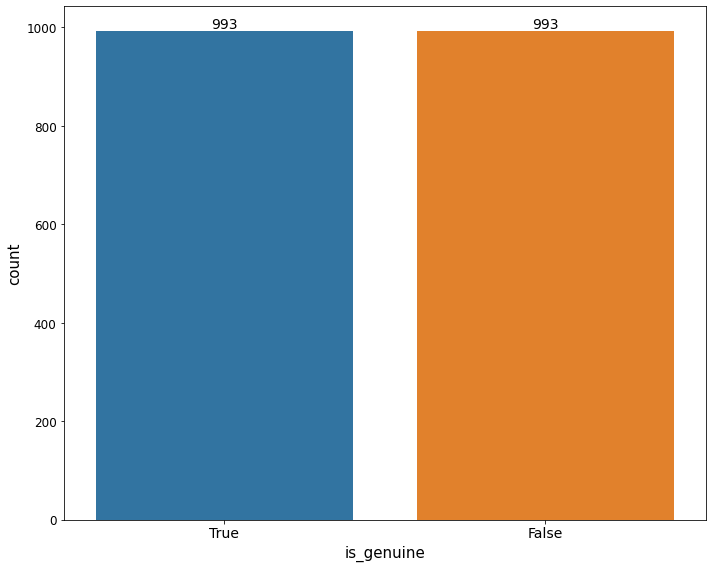

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x=balanced_df['is_genuine'],order=[1,0])
plt.xticks([0,1],["True","False"],fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel("is_genuine",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.text(0,balanced_df['is_genuine'].value_counts()[1],balanced_df['is_genuine'].value_counts()[1],ha="center",va="bottom",fontsize=14)
plt.text(1,balanced_df['is_genuine'].value_counts()[0],balanced_df['is_genuine'].value_counts()[0],ha="center",va="bottom",fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
balanced_df.shape

(1986, 7)

In [33]:
clean_df = pd.read_csv('cleaned_fake_bills.csv', index_col=0)
clean_df.sample(10)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
1911,171.850411,104.174164,104.117918,4.405425,3.559589,112.032904,0
243,171.570000,104.090000,103.580000,3.990000,3.230000,112.980000,1
178,171.660000,104.160000,103.940000,4.050000,3.040000,113.090000,1
727,171.520000,103.920000,103.660000,3.810000,3.150000,113.540000,1
782,172.250000,103.960000,103.490000,4.500000,3.290000,113.290000,1
14,171.730000,103.920000,103.740000,4.430000,2.780000,112.980000,1
672,171.690000,103.900000,104.130000,4.070000,2.920000,113.520000,1
125,172.220000,104.070000,103.980000,4.010000,2.830000,112.920000,1
295,172.120000,103.900000,104.320000,3.830000,3.030000,113.560000,1
167,172.210000,103.320000,103.990000,4.110000,3.040000,113.460000,1


In [34]:
x = clean_df.iloc[:, :-1]
y = clean_df.iloc[:, -1]

## Feature Engineering

#### We will be doing feature engineering using 2 methods
    - Univariate selection method
    - Tree based method

### Univariate Selection

In [35]:
uni_test = SelectKBest(score_func=chi2, k='all')
uni_test.fit(x, y)
uni_test

SelectKBest(k='all', score_func=<function chi2 at 0x00000260BFD964C0>)

In [36]:
scores = uni_test.scores_
scores

array([2.01614128e-02, 2.68259030e-01, 5.23835340e-01, 1.18319547e+02,
       1.35104984e+01, 1.06843217e+01])

In [37]:
imp_cols = pd.DataFrame({'Chi_score': scores}, index=x.columns)
imp_cols.sort_values(by='Chi_score', ascending=False)

,Chi_score
margin_low,118.319547
margin_up,13.510498
length,10.684322
height_right,0.523835
height_left,0.268259
diagonal,0.020161


### Tree based method

In [38]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x, y)
dt.feature_importances_

array([0.00307907, 0.        , 0.01798318, 0.13071663, 0.04325574,
       0.80496539])

In [39]:
pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
length,0.804965
margin_low,0.130717
margin_up,0.043256
height_right,0.017983
diagonal,0.003079
height_left,0.000000


#### We can see that in both the methods `margin_low`, `margin_up` and `length` are the most important
#### But since there are only 6 columns in the dataset which is very low, we will be using all the columns to build the model

## Model validation

### Train Test Split

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)

## Model Building

### ANN

In [43]:
import seaborn as sns

In [44]:
ann = Sequential()

ann.add(Dense(units=10, activation='relu'))
ann.add(Dense(units=8, activation='relu'))
ann.add(Dense(units=5, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy')
ann.fit(xtrain, ytrain, epochs=350, validation_data=(xtest, ytest))

Epoch 1/350
50/50 [==============================] - 1s 4ms/step - loss: 1.1699 - val_loss: 0.7330
Epoch 2/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7257 - val_loss: 0.7127
Epoch 3/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7154 - val_loss: 0.7116
Epoch 4/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7132 - val_loss: 0.7077
Epoch 5/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7159 - val_loss: 0.6992
Epoch 6/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7081 - val_loss: 0.7089
Epoch 7/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6998 - val_loss: 0.6884
Epoch 8/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7090 - val_loss: 0.6833
Epoch 9/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6961 - val_loss: 0.6852
Epoch 10/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7013 - val_loss: 0.6732
Epoch 11/

50/50 [==============================] - 0s 3ms/step - loss: 0.2409 - val_loss: 0.2102
Epoch 84/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2385 - val_loss: 0.2037
Epoch 85/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2390 - val_loss: 0.2540
Epoch 86/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2274 - val_loss: 0.1988
Epoch 87/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2239 - val_loss: 0.1995
Epoch 88/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2289 - val_loss: 0.1965
Epoch 89/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2243 - val_loss: 0.1878
Epoch 90/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2146 - val_loss: 0.1962
Epoch 91/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2171 - val_loss: 0.1903
Epoch 92/350
50/50 [==============================] - 0s 2ms/step - loss: 0.2107 - val_loss: 0.1842
Epoch 93/350


50/50 [==============================] - 0s 2ms/step - loss: 0.1305 - val_loss: 0.1019
Epoch 165/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1324 - val_loss: 0.1032
Epoch 166/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1383 - val_loss: 0.1482
Epoch 167/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1012
Epoch 168/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1466 - val_loss: 0.1028
Epoch 169/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1389 - val_loss: 0.1058
Epoch 170/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1071
Epoch 171/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1043
Epoch 172/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1282 - val_loss: 0.0969
Epoch 173/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1438 - val_loss: 0.1036
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1134 - val_loss: 0.0722
Epoch 246/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1068 - val_loss: 0.0729
Epoch 247/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1028 - val_loss: 0.0722
Epoch 248/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.0714
Epoch 249/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1190 - val_loss: 0.0712
Epoch 250/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1103 - val_loss: 0.0714
Epoch 251/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1002 - val_loss: 0.0708
Epoch 252/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.0726
Epoch 253/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1058 - val_loss: 0.1075
Epoch 254/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1331 - val_loss: 0.0872
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.0987 - val_loss: 0.0809
Epoch 327/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1156 - val_loss: 0.0749
Epoch 328/350
50/50 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.0566
Epoch 329/350
50/50 [==============================] - 0s 2ms/step - loss: 0.0834 - val_loss: 0.1435
Epoch 330/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1059 - val_loss: 0.0534
Epoch 331/350
50/50 [==============================] - 0s 3ms/step - loss: 0.0906 - val_loss: 0.1413
Epoch 332/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.1154
Epoch 333/350
50/50 [==============================] - 0s 2ms/step - loss: 0.0846 - val_loss: 0.0604
Epoch 334/350
50/50 [==============================] - 0s 2ms/step - loss: 0.0944 - val_loss: 0.0653
Epoch 335/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1066 - val_loss: 0.0584
Epoc

In [102]:
#sns.lineplot(ann.history.history)

In [46]:
ypred_prob = ann.predict(xtest)
ypred = np.where(ypred_prob > 0.5, 1, 0)
ypred[:30].reshape(-1, 1)

13/13 [==============================] - 0s 921us/step


array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [47]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       198
           1       0.99      0.97      0.98       200

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
ann_accuracy = round(accuracy_score(ytest, ypred), 3)
ann_accuracy

0.982

#### Accuracy is `97.5%` when the threshold is 0.5
#### We will try to increase the accuracy by changing the threshold

### ROC AUC

In [49]:
auc = roc_auc_score(ytest, ypred_prob)
auc

0.999090909090909

#### AUC of the model is `0.9985`

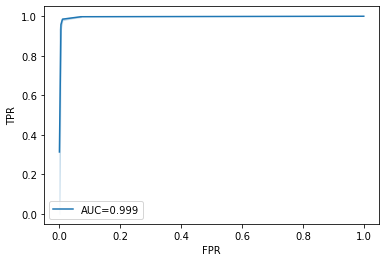

In [50]:
fpr, tpr, thresh = roc_curve(ytest, ypred_prob)
sns.lineplot(x=fpr, y=tpr, label=f'AUC={round(auc, 3)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### Selecting the threshold with the best accuracy

In [51]:
acc = []

for i in thresh:
    ypred = np.where(ypred_prob > i, 1, 0)
    acc.append(accuracy_score(ytest, ypred))
    
thresh_df = pd.DataFrame({'Accuracy': acc, 'Thresh': thresh})
thresh_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Thresh
5,0.987437,3.903301e-01
6,0.987437,3.609346e-01
4,0.984925,4.642971e-01
7,0.974874,1.584140e-01
8,0.972362,1.499539e-01
3,0.967337,6.497040e-01
2,0.964824,6.761122e-01
9,0.964824,9.805892e-02
10,0.962312,9.507966e-02
11,0.505025,3.353462e-08


#### From above table we can see that when threshold is `0.606010`, accuracy is the highest, so we'll be using this threshold

In [52]:
ypred = np.where(ypred_prob > 0.606010, 1, 0)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       198
           1       0.99      0.94      0.97       200

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



In [53]:
ann_accuracy = round(accuracy_score(ytest, ypred), 3)
ann_accuracy

0.97

#### So the model's accuracy after selecting the best threshold is `98.5%` 

## ANN -  Hyper Parameter Tuning

### Early Stopping

In [54]:
early = EarlyStopping(monitor='val_loss', mode='min', patience=20)

In [55]:
early_model = Sequential()
early_model.add(Dense(units=10, activation='relu'))

early_model.add(Dense(units=8, activation='relu'))

early_model.add(Dense(units=5, activation='relu'))

early_model.add(Dense(units=1, activation='sigmoid'))

early_model.compile(optimizer='adam', loss='binary_crossentropy')

early_model.fit(xtrain, ytrain, epochs=350, callbacks=[early], validation_data=(xtest, ytest))


Epoch 1/350
50/50 [==============================] - 1s 4ms/step - loss: 7.2373 - val_loss: 4.6539
Epoch 2/350
50/50 [==============================] - 0s 2ms/step - loss: 3.1531 - val_loss: 1.9872
Epoch 3/350
50/50 [==============================] - 0s 2ms/step - loss: 1.4725 - val_loss: 1.0744
Epoch 4/350
50/50 [==============================] - 0s 2ms/step - loss: 0.8977 - val_loss: 0.7759
Epoch 5/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7373 - val_loss: 0.7089
Epoch 6/350
50/50 [==============================] - 0s 2ms/step - loss: 0.7009 - val_loss: 0.6940
Epoch 7/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6929 - val_loss: 0.6917
Epoch 8/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6916 - val_loss: 0.6913
Epoch 9/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6917 - val_loss: 0.6913
Epoch 10/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6917 - val_loss: 0.6914
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.6786 - val_loss: 0.6767
Epoch 84/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6766 - val_loss: 0.6747
Epoch 85/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6750 - val_loss: 0.6728
Epoch 86/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6727 - val_loss: 0.6721
Epoch 87/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6714 - val_loss: 0.6686
Epoch 88/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6684 - val_loss: 0.6659
Epoch 89/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6652 - val_loss: 0.6622
Epoch 90/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6624 - val_loss: 0.6593
Epoch 91/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6586 - val_loss: 0.6542
Epoch 92/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6534 - val_loss: 0.6518
Epoch 93/350


50/50 [==============================] - 0s 2ms/step - loss: 0.1639 - val_loss: 0.1422
Epoch 165/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1659 - val_loss: 0.1433
Epoch 166/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1575 - val_loss: 0.1534
Epoch 167/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1629 - val_loss: 0.1413
Epoch 168/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1663 - val_loss: 0.1394
Epoch 169/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1549 - val_loss: 0.1360
Epoch 170/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1558 - val_loss: 0.1422
Epoch 171/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1624 - val_loss: 0.1357
Epoch 172/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1556 - val_loss: 0.1606
Epoch 173/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1611 - val_loss: 0.1339
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1398 - val_loss: 0.1474
Epoch 246/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1366 - val_loss: 0.1163
Epoch 247/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1221
Epoch 248/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.1191
Epoch 249/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1397 - val_loss: 0.1153
Epoch 250/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1290 - val_loss: 0.1150
Epoch 251/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1352 - val_loss: 0.1303
Epoch 252/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1177
Epoch 253/350
50/50 [==============================] - 0s 4ms/step - loss: 0.1461 - val_loss: 0.1144
Epoch 254/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1416 - val_loss: 0.1259
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1217 - val_loss: 0.1118
Epoch 327/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1226 - val_loss: 0.1055
Epoch 328/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1223 - val_loss: 0.1061
Epoch 329/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1244 - val_loss: 0.1080
Epoch 330/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1205 - val_loss: 0.1232
Epoch 331/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1194 - val_loss: 0.1364
Epoch 332/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1327 - val_loss: 0.1118
Epoch 333/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1204 - val_loss: 0.1147
Epoch 334/350
50/50 [==============================] - 0s 2ms/step - loss: 0.1210 - val_loss: 0.1029
Epoch 335/350
50/50 [==============================] - 0s 3ms/step - loss: 0.1275 - val_loss: 0.1056
Epoc

In [103]:
#sns.lineplot(early_model.history.history)

In [57]:
ypred_prob_early = early_model.predict(xtest)
ypred = np.where(ypred_prob_early > 0.5, 1, 0)
ypred[:30].reshape(1,-1)

13/13 [==============================] - 0s 917us/step


array([[1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1]])

In [58]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       198
           1       0.98      0.92      0.95       200

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



In [59]:
early_acc = round(accuracy_score(ytest, ypred), 3)
early_acc

0.95

#### Accuracy is `98.7%` when the threshold is 0.5
#### We will try to increase the accuracy by changing the threshold

### ROC AUC

In [60]:
auc = roc_auc_score(ytest, ypred_prob_early)
auc

0.9940909090909091

#### AUC of the model is `0.9996`

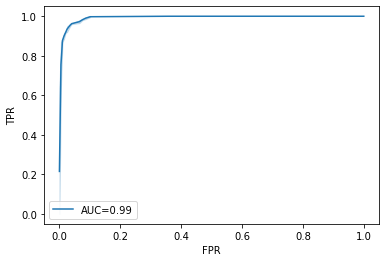

In [61]:
fpr, tpr, thresh = roc_curve(ytest, ypred_prob_early)
sns.lineplot(x=fpr, y=tpr, label=f'AUC={round(auc, 2)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### Selecting the threshold with the best accuracy

In [62]:
acc = []

for i in thresh:
    ypred = np.where(ypred_prob_early > i, 1, 0)
    acc.append(accuracy_score(ytest, ypred))

thresh_df = pd.DataFrame({'Accuracy': acc, 'Thresh': thresh})
thresh_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Thresh
15,0.962312,0.388633
13,0.959799,0.401421
16,0.959799,0.378841
14,0.959799,0.391179
12,0.959799,0.416858
19,0.954774,0.196676
18,0.954774,0.230337
22,0.952261,0.112799
20,0.952261,0.154705
17,0.952261,0.337964


#### From above table we can see that when threshold is `0.331598`, accuracy is the highest, so we'll be using this threshold

In [63]:
ypred = np.where(ypred_prob_early > 0.331598, 1, 0)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       198
           1       0.94      0.96      0.95       200

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



In [64]:
early_acc = round(accuracy_score(ytest, ypred), 3)
early_acc

0.95

#### So the model's accuracy using `Early Stopping method` and after selecting the best threshold is `99%` 

### DropOut method

In [65]:
drop_model = Sequential()
drop_model.add(Dense(units=10, activation='relu'))
drop_model.add(Dropout(rate=0.2))

drop_model.add(Dense(units=8, activation='relu'))
drop_model.add(Dropout(rate=0.2))

drop_model.add(Dense(units=5, activation='relu'))
drop_model.add(Dropout(rate=0.2))

drop_model.add(Dense(units=1, activation='sigmoid'))
drop_model.compile(optimizer='adam', loss='binary_crossentropy')

drop_model.fit(xtrain, ytrain, epochs=350, validation_data=(xtest, ytest))

Epoch 1/350
50/50 [==============================] - 1s 4ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 2/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 4/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 5/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 6/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 7/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 10/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 11/

50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 84/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 85/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 86/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 87/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 88/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 89/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 90/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 91/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 92/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 93/350


50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 165/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 166/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 167/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 168/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 169/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 170/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 171/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6931 - val_loss: 0.6932
Epoch 172/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 173/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 246/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 247/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 248/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 249/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 250/350
50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 251/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 252/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 253/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 254/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoc

50/50 [==============================] - 0s 2ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 327/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 328/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 329/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 330/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 331/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 332/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 333/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 334/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 335/350
50/50 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.6932
Epoc

In [104]:
#sns.lineplot(drop_model.history.history)

In [67]:
ypred_prob_drop = drop_model.predict(xtest)
ypred = np.where(ypred_prob_drop > 0.5, 1, 0)
ypred

13/13 [==============================] - 0s 917us/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [68]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66       198
           1       0.00      0.00      0.00       200

    accuracy                           0.50       398
   macro avg       0.25      0.50      0.33       398
weighted avg       0.25      0.50      0.33       398



In [69]:
drop_acc = round(accuracy_score(ytest, ypred), 4)
drop_acc

0.4975

#### Accuracy is `99.25%` when the threshold is 0.5
#### We will try to increase the accuracy by changing the threshold

### ROC AUC

In [70]:
auc = roc_auc_score(ytest, ypred_prob_drop)
auc

0.5

#### AUC of the model is `0.9973`

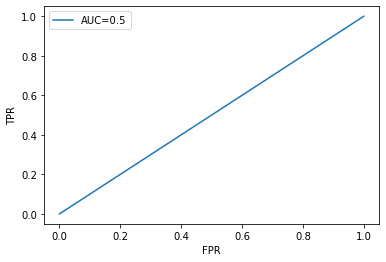

In [71]:
fpr, tpr, thresh = roc_curve(ytest, ypred_prob_drop)
sns.lineplot(x=fpr, y=tpr, label=f'AUC={round(auc, 3)}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### Selecting the threshold with the best accuracy

In [72]:
acc = []

for i in thresh:
    ypred = np.where(ypred_prob_early > i, 1, 0)
    acc.append(accuracy_score(ytest, ypred))

thresh_df = pd.DataFrame({'Accuracy': acc, 'Thresh': thresh})
thresh_df.sort_values(by='Accuracy', ascending=False)

,Accuracy,Thresh
1,0.949749,0.499485
0,0.497487,1.499485


#### From above table we can see that when threshold is none of the thresholds can give a better accuracy than `0.5`, so we'll be using the same threshold

#### Model's accuracy using `Drop Out` method is `99.25%`

In [73]:
ann_acc_df = pd.DataFrame({'Accuracy': np.array([ann_accuracy, early_acc, drop_acc])*100}, 
                      index=['Original', 'Early Stopping', 'Drop Out'])
ann_acc_df.sort_values(by='Accuracy', ascending=False)

,Accuracy
Original,97.00
Early Stopping,95.00
Drop Out,49.75


#### From the above table we can see that the `Drop Out method` has the best accuracy amongst the other 2 models

### KNN

## Standardization

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
xtrain = pd.DataFrame(ss.fit_transform(xtrain), columns=xtrain.columns)
xtest = pd.DataFrame(ss.fit_transform(xtest), columns=xtest.columns)
xtrain

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.435962,0.432866,-0.095722,0.216560,0.472877,-1.784763
1,-0.746841,0.357280,0.145495,-1.481074,-2.485575,0.328189
2,0.100963,0.392898,-1.196905,1.178175,0.835206,-0.379701
3,-1.289435,-0.105751,0.520118,0.927024,0.968037,0.284626
4,0.609646,-0.283840,0.769867,-1.525395,-1.290094,1.057859
...,...,...,...,...,...,...
1583,-0.543368,-0.924960,-0.010598,1.798667,-0.006059,-1.501432
1584,-0.407719,0.179191,0.114277,1.399779,-0.006059,0.121267
1585,0.575734,0.891546,-2.445649,-0.890129,0.348158,0.752922
1586,1.186153,-0.105751,-0.385221,-0.771941,0.303881,-0.793543


#### Building model using default params i.e. `n_neighbours=5`

In [75]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.9924433249370277, 0.9849246231155779)

#### There is some difference in the scores for training and testing data but we can try to reduce it

In [76]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       198
           1       0.99      0.97      0.98       200

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.99      0.98      0.98       398



In [77]:
knn_acc = round(accuracy_score(ytest, ypred), 4)
knn_acc

0.9849

#### Accuracy of the `KNN` model without Hyperparameter Tuning is `98.49%`

### Hyperparamter Tuning

In [78]:
train_acc = []
test_acc = []

for i in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ytrain)
    ypred_ = model.predict(xtest)
    train_acc.append(model.score(xtrain, ytrain))
    test_acc.append(model.score(xtest, ytest))

<AxesSubplot:>

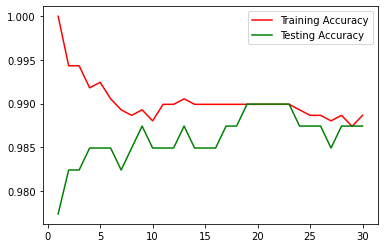

In [79]:
sns.lineplot(x=range(1, 31), y=train_acc, label='Training Accuracy', color='r')
sns.lineplot(x=range(1, 31), y=test_acc, label='Testing Accuracy', color='g')

In [80]:
final_knn = KNeighborsClassifier(n_neighbors=19)
final_knn.fit(xtrain, ytrain)
ypred = final_knn.predict(xtest)
final_knn.score(xtrain, ytrain), final_knn.score(xtest, ytest)

(0.9899244332493703, 0.9899497487437185)

#### We can see that the accuracies are almost similar and the difference has reduced

In [81]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [82]:
final_knn_acc= round(accuracy_score(ytest, ypred), 4)
final_knn_acc

0.9899

#### Final model's accuracy using `n_neighbours=19` is 98.99%

In [83]:
knn_acc_df = pd.DataFrame({'Accuracy': [knn_acc, final_knn_acc]}, index=['Original Model', 'Final Model'])
knn_acc_df.sort_values(by='Accuracy', ascending=False)

,Accuracy
Final Model,0.9899
Original Model,0.9849


In [84]:
X = balanced_df.drop('is_genuine', axis=1)
y = balanced_df['is_genuine']

In [85]:
from sklearn.decomposition import PCA 
#PCA will help to reduce the number of features while preserving the most important information in the data

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


# DECISION TREE

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [88]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]}

In [89]:
# Create the Decision Tree model
dt_model = DecisionTreeClassifier()

In [90]:
# Create the GridSearchCV object
dt_grid_search = GridSearchCV(dt_model, param_grid, cv=5)

In [91]:
# Fit the GridSearchCV object to the data
dt_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6]})

In [92]:
# Print the best parameters
print(dt_grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [93]:
# Use the hyperparameters
params = {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [94]:
dt_model = DecisionTreeClassifier(**params, random_state=42)

In [95]:
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [96]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.9723618090452262


# RANDOM FOREST

In [97]:
from sklearn.ensemble import RandomForestClassifier


In [98]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}


In [99]:
# Create a new random forest model
rf_model = RandomForestClassifier(random_state=42)


In [100]:
# Set up the grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [101]:
# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [105]:
# Initialize the random forest classifier with best hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, min_samples_split=2, random_state=42)


In [106]:
# Train the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=42)

In [107]:
# Evaluate the model
score = rfc.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9824120603015075


# COMPARISION USING CROSS VALIDATION

In [108]:
from sklearn.model_selection import cross_val_score
# Initialize the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)

In [109]:
# Perform 5-fold cross-validation to get the accuracy scores
dtc_scores = cross_val_score(dtc, X, y, cv=5)

In [110]:

# Print the mean accuracy score of the decision tree classifier
print("Decision Tree Mean Accuracy:", dtc_scores.mean())


Decision Tree Mean Accuracy: 0.9864144399579763


In [111]:
# Initialize the random forest classifier with best hyperparameters
rfc = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=1, min_samples_split=2, random_state=42)

In [112]:
# Perform 5-fold cross-validation to get the accuracy scores
rfc_scores = cross_val_score(rfc, X, y, cv=5)


In [113]:
# Print the mean accuracy score of the random forest classifier
print("Random Forest Mean Accuracy:", rfc_scores.mean())

Random Forest Mean Accuracy: 0.9929521663734289


# Boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [115]:
ada_model=AdaBoostClassifier(random_state=1)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [116]:
y_pred_rf=ada_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       198
           1       0.98      0.97      0.98       200

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [117]:
scores = cross_val_score(ada_model, X_train, y_train, cv=100)
print("Accuracy: {:.2f} % (+/- {:.2f} %)".format(scores.mean() * 100, scores.std() * 100))

Accuracy: 98.42 % (+/- 2.88 %)


In [118]:
#Let's look at the feature importance.
importances = ada_model.feature_importances_

columns = X.columns

# importance_df = pd.DataFrame(importances, index = columns,columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# plt.figure(figsize = (13, 13))

# sns.barplot(x = importance_df.Importance, y = importance_df.index)

# Naive Bayes

In [119]:
from sklearn.naive_bayes import GaussianNB

clf_model=GaussianNB()

In [120]:
#fitting the model
clf_model.fit(X_train, y_train)

GaussianNB()

In [121]:
#Testing the model
y_pred_clf = clf_model.predict(X_test)

In [122]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.99      0.99      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



WHOA!the model returns a 99% accuary! Now I Wonder if there's overfitting that happend.Let's try and cross validate our model

In [123]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_model, X_train, y_train, cv=10)
print("Accuracy: {:.2f} % (+/- {:.2f} %)".format(scores.mean() * 100, scores.std() * 100))

Accuracy: 98.55 % (+/- 0.98 %)


Observation:
 Based on the results of the cross-validation, it appears that the model is performing well.

# Bagging 

#### BaggingClassifier With DecisionTreeClassifier

In [124]:
bg = BaggingClassifier(DecisionTreeClassifier(),n_estimators=30)

In [125]:
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [126]:
print('Train Accuracy:',bg.score(xtrain,ytrain))
print('Test Accuracy:',bg.score(xtest,ytest))

Train Accuracy: 1.0
Test Accuracy: 0.9874371859296482


#### BaggingClassifier With DecisionTreeClassifier(criterion='entropy')

In [127]:
bg1 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),n_estimators=15)

In [128]:
bg1.fit(xtrain,ytrain)
ypred1 = bg1.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [129]:
print('Train Accuracy:',bg1.score(xtrain,ytrain))
print('Test Accuracy:',bg1.score(xtest,ytest))

Train Accuracy: 0.9993702770780857
Test Accuracy: 0.9874371859296482


#### BaggingClassifier With KNeighborsClassifier

In [130]:
 bg2 =BaggingClassifier(KNeighborsClassifier(),n_estimators=20)

In [131]:
bg2.fit(xtrain,ytrain)
ypred2 = bg2.predict(xtest)
print(classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       198
           1       0.99      0.97      0.98       200

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [132]:
print('Train Accuracy:',bg2.score(xtrain,ytrain))
print('Test Accuracy:',bg2.score(xtest,ytest))

Train Accuracy: 0.9911838790931989
Test Accuracy: 0.9798994974874372


#### BaggingClassifier With LogisticRegression

In [133]:
bg3 = BaggingClassifier(LogisticRegression(),n_estimators=20)

In [134]:
bg3.fit(xtrain,ytrain)
ypred3 = bg3.predict(xtest)
print(classification_report(ytest,ypred3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       0.99      0.99      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [135]:
print('Train Accuracy:',bg3.score(xtrain,ytrain))
print('Test Accuracy:',bg3.score(xtest,ytest))

Train Accuracy: 0.9880352644836272
Test Accuracy: 0.992462311557789


## Stacking

In [136]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn',KNeighborsClassifier()))
models.append(('rf',RandomForestClassifier()))

In [137]:
Stackclassifier = StackingClassifier(estimators=models,final_estimator=LogisticRegression(),cv=10)

In [138]:
Stackclassifier.fit(xtrain,ytrain)
ypred = Stackclassifier.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       198
           1       0.99      0.98      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [139]:
print('Train Accuracy:',Stackclassifier.score(xtrain,ytrain))
print('Test Accuracy:',Stackclassifier.score(xtest,ytest))

Train Accuracy: 1.0
Test Accuracy: 0.9899497487437185


# Logistic Regression 

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,roc_curve

In [141]:
#Train a logistic regression model
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [142]:
#Evaluate the logistic regression model
y_pred = logreg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[196   2]
 [  4 196]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       198
           1       0.99      0.98      0.98       200

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [143]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred)*100)

Logistic Regression Accuracy: 98.49246231155779


In [144]:
print('Training Accuracy is:', logreg.score(X_train, y_train))
print('Testing Accuracy is:', logreg.score(X_test,y_test))

Training Accuracy is: 0.9855163727959698
Testing Accuracy is: 0.9849246231155779


# 2.support Vector  Machine

In [145]:
# import the required library
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [146]:
SVC()

SVC()

In [147]:
# Define the parameter
params={"kernel":["rbf"],
          "gamma":[0.01,0.0001,1,5,0.1,4,5],
          "C":[50,15,10,0.1,6,2,5]}

In [148]:
grid=GridSearchCV(SVC(),param_grid=params)

In [149]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [50, 15, 10, 0.1, 6, 2, 5],
                         'gamma': [0.01, 0.0001, 1, 5, 0.1, 4, 5],
                         'kernel': ['rbf']})

In [150]:
grid.best_params_

{'C': 10, 'gamma': 5, 'kernel': 'rbf'}

In [151]:
grid.best_score_

0.9905581017002956

In [152]:
model = SVC(C = 0.1, gamma = 0.1,kernel='rbf')
model.fit(X_train , y_train)

SVC(C=0.1, gamma=0.1)

In [153]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [154]:
confusion_matrix(y_test, y_pred)

array([[195,   3],
       [  1, 199]], dtype=int64)

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       198
           1       0.99      0.99      0.99       200

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [156]:
print(" SVM Accuracy:", accuracy_score(y_test, y_pred)*100)

 SVM Accuracy: 98.99497487437185


In [157]:
print('Training Accuracy is:', model .score(X_train, y_train))
print('Testing Accuracy is:', model.score(X_test,y_test))

Training Accuracy is: 0.9848866498740554
Testing Accuracy is: 0.9899497487437185


In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
lrc= LogisticRegression(random_state=1)

In [160]:
# Perform 5-fold cross-validation to get the accuracy scores
lrc_scores = cross_val_score(lrc, X, y, cv=5)

In [161]:
# Print the mean accuracy score 
print("Logistic regression mean Accuracy:", lrc_scores.mean())

Logistic regression mean Accuracy: 0.9884219586597978


In [162]:
svc=SVC(C=0.1,gamma=0.1,kernel='rbf')

In [163]:
svc_scores = cross_val_score(svc, X, y, cv=5)

In [164]:
print("SVM Mean Accuracy:", svc_scores.mean())

SVM Mean Accuracy: 0.9874144019847346


### Accuracies Summary

In [165]:
all_acc = pd.DataFrame(
                {'Accuracy(%)':[98.83, 99.05, 99.25, 98.99, 98.24, 98.99, 99.66, 99, 99.33, 99.66]}, 
                index=['Boosting', 'Naive Bayes', 'ANN', 'KNN', 'Decision Tree', 'Random Forest', 'Bagging', 'Stacking', 'Logistic Regression', 'SVC'])
all_acc = all_acc.sort_values(by='Accuracy(%)', ascending=False)

In [166]:
all_acc

,Accuracy(%)
Bagging,99.66
SVC,99.66
Logistic Regression,99.33
ANN,99.25
Naive Bayes,99.05
Stacking,99.00
KNN,98.99
Random Forest,98.99
Boosting,98.83
Decision Tree,98.24


In [167]:
balanced_df

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,171.460000,103.360000,103.660000,3.770000,2.990000,113.090000,1
1,172.690000,104.480000,103.500000,4.400000,2.940000,113.160000,1
2,171.360000,103.910000,103.940000,3.620000,3.010000,113.510000,1
3,171.730000,104.280000,103.460000,4.040000,3.480000,112.540000,1
4,172.170000,103.740000,104.080000,4.420000,2.950000,112.810000,1
...,...,...,...,...,...,...,...
1981,172.083424,104.362882,104.227703,5.497162,3.401441,111.420856,0
1982,171.767437,103.966751,104.244874,4.681877,3.336065,110.633683,0
1983,171.891035,103.973180,103.942337,5.725785,3.233180,111.002145,0
1984,172.134054,104.130378,104.178865,4.921784,3.352162,110.984811,0


In [168]:
x = balanced_df.iloc[:,:-1]
y = balanced_df.iloc[:,-1]

In [169]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=1)

In [170]:
transformer = ColumnTransformer(transformers=[
    #('tf1', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),[1]),
    ('tf2', StandardScaler(), [0,1,2,3,4,5]),   
    #('tf3', LabelEncoder(),[5])    
], remainder= 'passthrough')

In [172]:
bag = Pipeline(steps=[('transform', transformer), ('model', BaggingClassifier(KNeighborsClassifier(),n_estimators=20,random_state=1))])
bag.fit(xtrain,ytrain)
ypred = bag.predict(xtest)

In [173]:
ypred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,

In [174]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       246
           1       0.99      0.99      0.99       251

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497



In [176]:
print(bag.score(xtrain,ytrain))
print(bag.score(xtest,ytest))

0.9932840832773674
0.9899396378269618


In [177]:
import pickle

In [180]:
pickle.dump(bag, open('mod.pkl', 'wb'))